In [ ]:
import os
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans

In [65]:
spotify_df = pd.read_csv('/Users/anikasethi/Desktop/train_dataset.csv')
spotify_df = spotify_df.drop_duplicates(subset='id', keep='first')

# features to train on (need to be normalized)
train_features = ['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'time_signature']
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [66]:
# abridged df with training features (need to normalize them)
spotify_df_train_abridged = spotify_df[train_features]
#instance of standard scaler
scaler = StandardScaler()
# fit_transform = (1) fit using mean and std (2) applies standardization formula on each value
df_scaled = scaler.fit_transform(spotify_df_train_abridged)

# copy original df 
spotify_normalized_df = spotify_df.copy()
# update train_features
spotify_normalized_df[train_features] = df_scaled

spotify_df_train = spotify_normalized_df[['id'] + train_features]
spotify_df_train.head()

,id,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,-1.174160,-0.214754,0.490096,-0.385182,-1.483654,-0.615393,0.719665,1.924128,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842
1,021ht4sdgPcrDgSk7JTbKY,-1.500768,-0.214754,0.791115,-1.107625,-1.483654,-2.344110,0.719665,4.736917,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724
2,07A5yehtSnoedViJAZkNnc,-1.500768,-0.214754,-0.780204,-1.449000,-1.199517,-2.156266,0.719665,-0.298309,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040
3,08FmqUhxtyLTn6pAh6bk45,-1.500768,-0.214754,-1.460507,-1.776084,0.505310,-3.488663,0.719665,-0.302756,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842
4,08y9GfoqCWfOGsKdwojr5e,-1.500768,-0.214754,-0.972856,-1.524420,-0.631241,-1.315289,-1.389536,-0.366127,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599


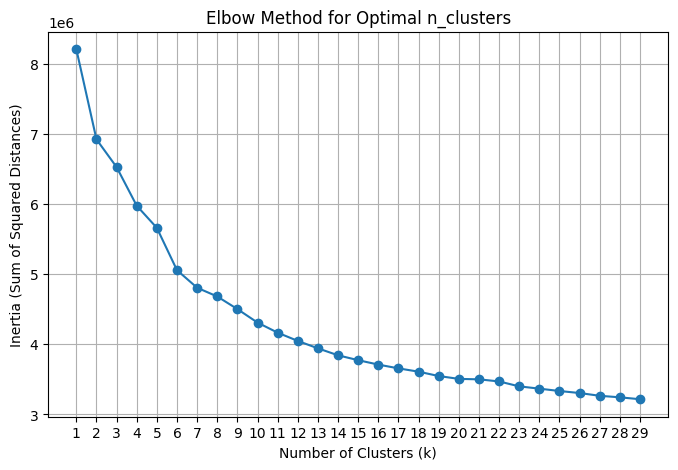

In [ ]:
# elbow method 
inertia = []

# try the following cluster values
cluster_range = range(1, 30)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spotify_df_train[train_features])
    inertia.append(kmeans.inertia_)

# plot inertia values to pick
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# picking k = 6

In [83]:
# n_clusters picked using elbow method
kmeans = KMeans(n_clusters=6, random_state=42)
# fit k-means to normalized data
kmeans.fit(spotify_df_train[train_features])
# add cluster labels
spotify_normalized_df['cluster'] = kmeans.labels_
spotify_normalized_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.174160,126903,-0.214754,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.490096,-0.385182,...,-0.615393,0.719665,1.924128,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.500768,98200,-0.214754,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791115,-1.107625,...,-2.344110,0.719665,4.736917,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724,3
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.500768,181640,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780204,-1.449000,...,-2.156266,0.719665,-0.298309,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040,2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.500768,176907,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460507,-1.776084,...,-3.488663,0.719665,-0.302756,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.500768,163080,-0.214754,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972856,-1.524420,...,-1.315289,-1.389536,-0.366127,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599,2


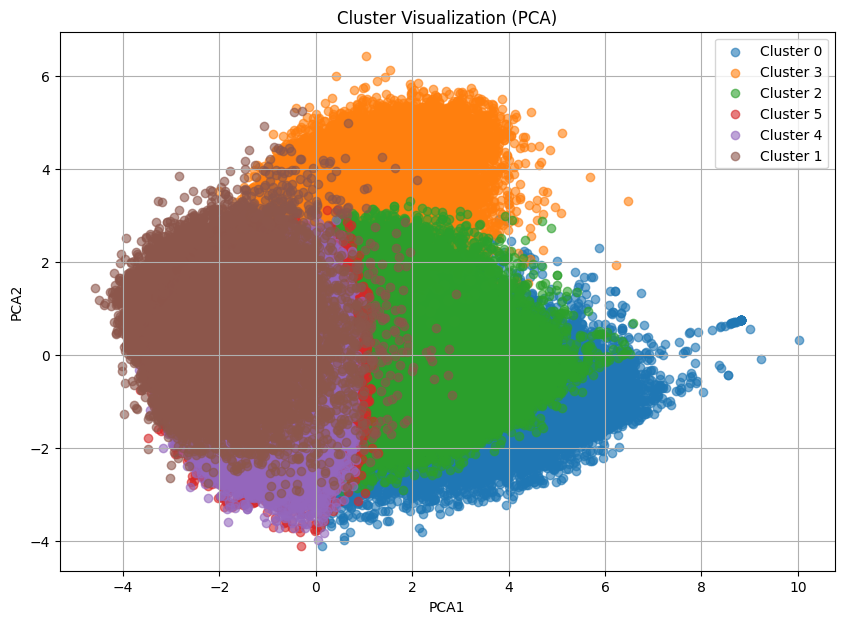

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions of the normalized training data
pca = PCA(n_components=2)
spotify_train_pca = pca.fit_transform(spotify_df_train[train_features])

# Create a DataFrame for PCA results
spotify_train_pca_df = pd.DataFrame(spotify_train_pca, columns=['PCA1', 'PCA2'])
spotify_train_pca_df['cluster'] = spotify_normalized_df['cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster_label in spotify_train_pca_df['cluster'].unique():
    cluster_data = spotify_train_pca_df[spotify_train_pca_df['cluster'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_label}', alpha=0.6)

plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()

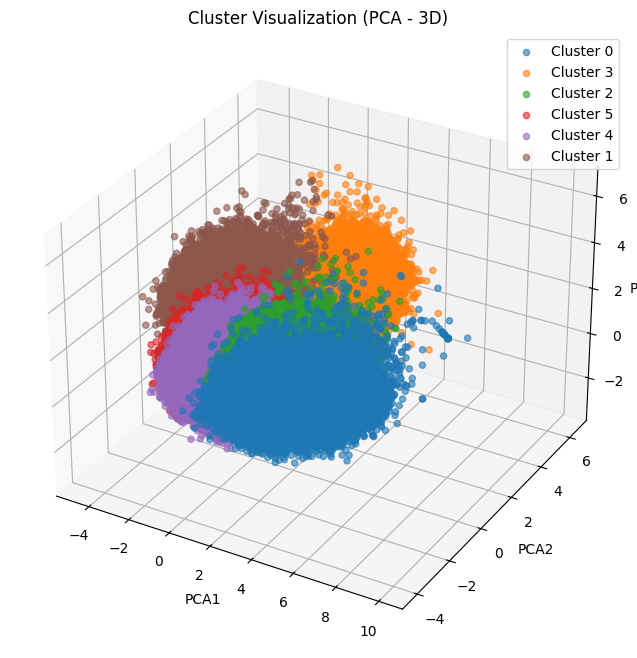

In [85]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduce dimensions to 3 for a 3D scatter plot
pca_3d = PCA(n_components=3)
spotify_train_pca_3d = pca_3d.fit_transform(spotify_df_train[train_features])

# Create a DataFrame for PCA results
spotify_train_pca_3d_df = pd.DataFrame(spotify_train_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
spotify_train_pca_3d_df['cluster'] = spotify_normalized_df['cluster']

# Plot in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in spotify_train_pca_3d_df['cluster'].unique():
    cluster_data = spotify_train_pca_3d_df[spotify_train_pca_3d_df['cluster'] == cluster_label]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster_label}', alpha=0.6)

ax.set_title('Cluster Visualization (PCA - 3D)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

In [91]:
# testing data
spotify_df_test = pd.read_csv('/Users/anikasethi/Desktop/test_dataset.csv')
spotify_df_test = spotify_df_test.drop_duplicates(subset='track_id', keep='first')

# Normalize the new dataset using the same scaler
test_dataset_features = spotify_df_test[train_features]
new_dataset_scaled = scaler.transform(test_dataset_features)

# Predict clusters for the new dataset
# Convert the scaled test dataset back to a DataFrame
new_dataset_scaled_df = pd.DataFrame(new_dataset_scaled, columns=train_features)

# Predict clusters using the trained KMeans model
spotify_df_test['cluster'] = kmeans.predict(new_dataset_scaled_df)

# selected_songs = spotify_df_test.sample(n=10, random_state=42)
selected_songs = spotify_df_test[spotify_df_test['track_id'].isin([
'6Im9k8u9iIzKMrmV7BWtlF', '78qd8dvwea0Gosb6Fe6j3k', '44ONERBHALxftQNWq6dmyd', '0z8hI3OPS8ADPWtoCjjLl6', '3zkWCteF82vJwv0hRLba76', 
'08AVok9laWpSSpX42guJ2K', '6K9UYBSvkOadWYO5nUrfVP', '2m6Ko3CY1qXNNja8AlugNc', '0Y9PqGjKgupH5fKbrgDQUr', '3bCp61o3h46Yvr0vgMJlaL'
])]

print(selected_songs["track_name"])



20054                               Angel Baby
20074                               Levitating
20153                                    34+35
20155                               Boss Bitch
20156                             Side To Side
20157    Summer of Love (Shawn Mendes & Tainy)
20160                                 Stitches
20235                    Cozy Little Christmas
20826                                   Middle
20871                              Close To Me
Name: track_name, dtype: object


In [90]:
import numpy as np

recommendations = []
used_ids = set()  # Track IDs of already recommended songs

for _, song in selected_songs.iterrows():
    cluster_label = song['cluster']  # Get the cluster of the selected song
    
    # Filter songs in the same cluster from the training dataset
    cluster_songs = spotify_normalized_df[spotify_normalized_df['cluster'] == cluster_label]
    
    # Exclude the selected song itself and already recommended songs
    cluster_songs = cluster_songs[
        (cluster_songs['id'] != song['track_id']) &
        (~cluster_songs['id'].isin(used_ids))
    ]
    
    # Calculate distances if there are other songs in the cluster
    if not cluster_songs.empty:
        # Ensure numeric arrays for features
        selected_song_features = song[train_features].values.astype(float)  # Convert to numpy array
        cluster_songs_features = cluster_songs[train_features].values.astype(float)  # Convert to numpy array
        
        # Compute Euclidean distances
        distances = np.linalg.norm(cluster_songs_features - selected_song_features, axis=1)
        
        # Find the index of the closest song
        nearest_song_idx = np.argmin(distances)
        
        # Get the nearest song from the DataFrame
        nearest_song = cluster_songs.iloc[nearest_song_idx]
        recommendations.append(nearest_song)
        
        # Add the recommended song's ID to the used list
        used_ids.add(nearest_song['id'])

# Combine all recommendations into a single DataFrame
recommended_songs = pd.DataFrame(recommendations)

# Display the recommended songs
print(recommended_songs[['id', 'name', 'cluster']])


                            id                         name  cluster
91045   2fSW54bA6x2iWePU7rpCiP                     Mama Cry        1
410224  5XKiZdSeZQOKMDCCbFizUf                         誰來愛我        4
126536  56n7xjncKs9RInEHAmjtco  I Don't Want You on My Mind        5
257011  6YiFO4Z74jjyJXWfqLH0Gy                   Melon Cake        4
41346   4xhHhecO7i0jEySdGKQMWp                Dear Landlord        2
409021  1Wsqz0FgrxXgv6ph69dBDH                         兩隻老虎        4
155690  0X5jHsNHshuHNfAWs1sxQ5                    Permitame        4
45719   55ROr3cl3yi4YRBgfpDy1d              Call The Doctor        0
261669  0fDiVNi8CF8AQ1hrAeE4Qs                  Sám v daždi        4
488827  0ZyMfXeQO0DYRNhcxSDeYP                       Gugus1        0
